# Data Scientist Nanodegree

## Project Description

This is the capstone project for the Udacity Data Science NanoDegree (DSND). The purpose is to create a dog app that classifies dog breeds. I also use the resultant classifier to predict what human face is similar to a dog breed. This is based on the idea that owners and their dogs often look alike. 

The project uses 2 datasets of dog breeds. One that is provided by Udacity and another that is from Stanford University. 

I have the following models in this notebook.

__Custom CNN From Scratch__
- My_CNN_Model - Used ideas from course and from research to build my own CNN model!

__Transfer Learning__

- ResNet50 - Driven by the significance of convolutional neural network, the residual network (ResNet) was created. ResNet was designed by Kaiming He in 2015 in a paper titled Deep Residual Learning for Image Recognition. In this paper, he discussed a model built by his team which bagged the ImageNet challenges in all the domains such as classification, detection, and localisation.
- VGG16 - is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.
- Vgg19 - AlexNet came out in 2012 and it improved on the traditional Convolutional neural networks, So we can understand VGG as a successor of the AlexNet but it was created by a different group named as Visual Geometry Group at Oxford's and hence the name VGG, It carries and uses some ideas from it's predecessors and improves on them and uses deep Convolutional neural layers to improve accuracy.
- InceptionV3 - is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. The model is the culmination of many ideas developed by multiple researchers over the years. It is based on the original paper: "Rethinking the Inception Architecture for Computer Vision" by Szegedy, et. al.

At the end of the notebook I demonstrate the classifier working at a very high level. I also provide metrics on the performance of the multiple CNNs that I developed (transfer learning and written from scratch)

## Problem Statement

Creating a classifier that can distinguish between dogs and cats with today's technology is something that almost any practiioner can accomplish by coding a CNN from scratch. However, to distinguish between breeds and to choose what breed of dog resembles a human is an entirely different level of complexity. There are 133 dog breeds in this dataset. Humans have a difficult time identifying dog breeds correctly. The purpose of this dog_app notebook is to solve that problem.

## Metrics

In order to properly evaluate the success or failure of our dog_app, I need a metric that is appropriate. Accuracy is the quintessential classification metric. It is easy to understand and well suited for multiclass classification problems. Accuracy is the proportion of true results among the total number of cases examined. I will state that as a percentage in this notebook.

I will not be using Precision, Recall, or F1 scores in scoring these algorithms. The reasons are that the classes in our dataset are relatively well balanced. There is little incentive for the CNN to cheat by guessing all 1 class (for example). The test set will not reward the classifier for this behaviour. 

This also not a test for cancer. The effect of False Negatives or False Positives on the people / dogs involved with using the dog_app is pretty benign. 

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 


This notebook walks you through one of the most popular Udacity projects across machine learning and artificial intellegence nanodegree programs.  The goal is to classify images of dogs according to their breed.  

If you are looking for a more guided capstone project related to deep learning and convolutional neural networks, this might be just it.  Notice that even if you follow the notebook to creating your classifier, you must still create a blog post or deploy an application to fulfill the requirements of the capstone project.

Also notice, you may be able to use only parts of this notebook (for example certain coding portions or the data) without completing all parts and still meet all requirements of the capstone project.

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
# import libraries
import cv2
from datetime import datetime
from extract_bottleneck_features import *
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import random
from shutil import copyfile, copytree, rmtree
from sklearn.datasets import load_files 
from tqdm import tqdm

from tensorflow import device
from keras.utils import np_utils
from tensorflow import config
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50           
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import load_model, Model, Sequential
from tensorflow.keras.preprocessing import image   
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator


In [8]:
# Check and make sure the gpu is available
config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
# Force keras to run on the gpu
with device("/GPU:0"):
   print("tensorflow.keras code in this scope will run on GPU")

tensorflow.keras code in this scope will run on GPU


In [10]:
# define function to load train, test, and validation datasets
def load_dataset(path, nof_classes):
    
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), nof_classes)
    
    return dog_files, dog_targets


In [11]:
# load train, test, and validation datasets
path_dogs = r'D:\large_files\DSND_Capstone\data\dog_images'
train_files, train_targets = load_dataset(path_dogs + r'\train', 133)
valid_files, valid_targets = load_dataset(path_dogs + r'\valid', 133)
test_files, test_targets = load_dataset(path_dogs + r'\test', 133)

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob(path_dogs + r"/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [12]:
# load filenames in shuffled human dataset
path_humans = r'D:\large_files\DSND_Capstone\data' 
human_files = np.array(glob(path_humans + r"/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


---
<a id='step05'></a>
## Step 0.5: Data Exploration

In [13]:
#Change the working directory
path_dogs_train = r'D:\large_files\DSND_Capstone\data\dog_images\train'
os.chdir(path_dogs_train)
os.getcwd()

'D:\\large_files\\DSND_Capstone\\data\\dog_images\\train'

In [14]:
def count_files_in_folders(path, sep):
    """Creates a dataframe of the folder with file counts in that folder
    
    input: path(str) - the file path of the directory that you want to count the subfolders in
           sep(str) -  the seperator that is used to break apart the folder name
    output: folder_counts_df(df) -  that has the following columns:
                       folder_number (int), breed (str), len_files (int)
    """
    #Change the working directory
    os.chdir(path)

    result_list = []
    path, dirs, files = next(os.walk("."))
    for dir_ in dirs:

        # Split the folder name into a folder number and a breed
        folder_number, breed = dir_.split(sep, 1)

        # Get the number of files in the directory
        files_ = glob(dir_ + r"\*.*")
        len_files = (len(files_))

        # Create a dictionary of values
        result_dict = {'folder_name': dir_,
                       'folder_number': folder_number,
                       'breed': breed,
                       'len_files': len_files}

        # Append to a list
        result_list.append(result_dict)

    # Create the df
    dog_folder_counts_df = pd.DataFrame(result_list)

    # Sort
    dog_folder_counts_df.sort_values(by = ['len_files'], inplace = True)
    
    return dog_folder_counts_df


In [15]:
#Change the working directory
path = r'D:\large_files\DSND_Capstone\data\dog_images\train'
sep = '.'

# Call the function to count the files
dog_folder_counts_df = count_files_in_folders(path, sep)
dog_folder_counts_df.head()

,folder_name,folder_number,breed,len_files
107,108.Norwegian_buhund,108,Norwegian_buhund,26
131,132.Xoloitzcuintli,132,Xoloitzcuintli,26
120,121.Plott,121,Plott,28
101,102.Manchester_terrier,102,Manchester_terrier,29
132,133.Yorkshire_terrier,133,Yorkshire_terrier,30


In [16]:
dog_folder_counts_df.describe()

,len_files
count,133.000000
mean,50.225564
std,11.863885
min,26.000000
25%,42.000000
50%,50.000000
75%,61.000000
max,77.000000


In [119]:
def plot_folder_counts(folder_counts_df):
    """Horizontally bar plots the folder counts"""
    
    y_pos = np.arange(folder_counts_df.shape[0])
    plt.figure(figsize = (12, 24))
    plt.title('Folder Counts By Dog Breed')
    plt.ylim(min(y_pos)-1, max(y_pos)+1)
    plt.barh('breed', 'len_files', data = dog_folder_counts_df)
    plt.savefig(r'images\folders_count.png', dpi=300, bbox_inches='tight')
    plt.show();
    

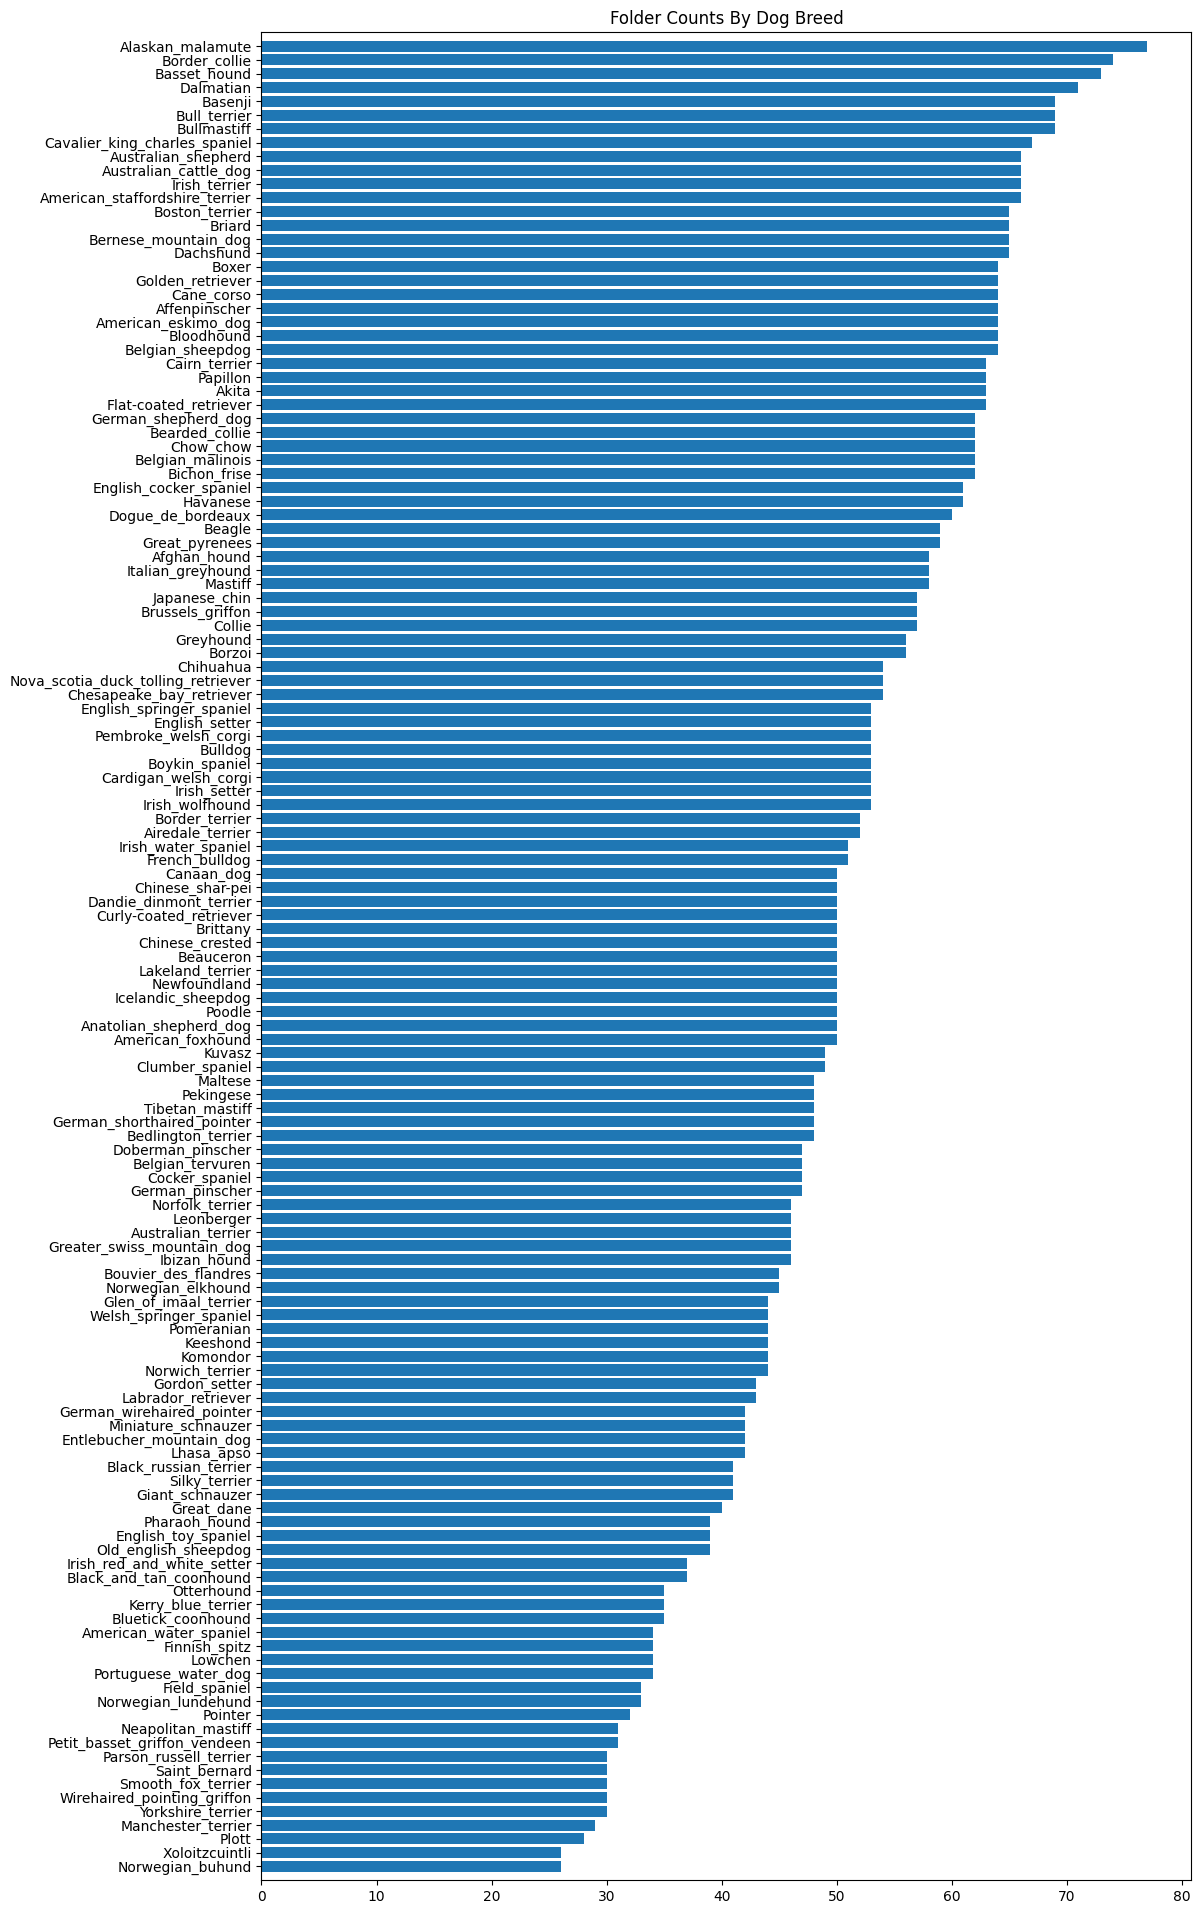

In [120]:
plot_folder_counts(dog_folder_counts_df)

This is a relatively unbalanced training set. There are triple the number of Alaskan Malamutes as compared to the Norwegian Blood Hound. I would prefer to have exactly the same number of pictures of all of the breeds. Lets look at another dataset from http://vision.stanford.edu/aditya86/ImageNetDogs/. The EDA of that dataset and the resultant Transfer Learning training is available in the iv3_stanford.ipynb notebook.

### Image Variability Analysis

I want to see how much our images vary in terms of sizes (height and width). This variability will impact our pre processing decisions. All images have to be the same size. Lots of variability means that I may have some images that do not work well in terms of training the classifier. 

In [19]:
def sample_images(input_file, idx, sep):
    """Load an image using keras load_img"""
    
    path = input_file[idx]
    img = load_img(path)
    
    breed = path.split(sep, 1)[1]
    
    return img, breed


Pekingese\Pekingese_07563.jpg


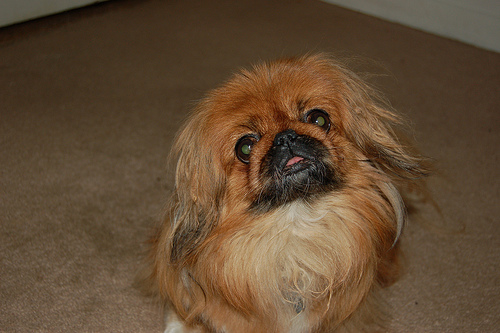

In [20]:
# Run this cell a few times to see the variation in the images
idx = random.randint(0, train_files.shape[0])
img, path = sample_images(train_files, idx, '.')
print(path)
img

In [21]:
# get height and width of each dog picture
height, width, path = [], [], []
for idx in range(len(train_files)):
    img = cv2.imread(train_files[idx])
    path.append(train_files[idx])
    height.append(img.shape[0])
    width.append(img.shape[1])

In [22]:
# Create a df to get some statistics
height_width_df = pd.DataFrame({'height': height,
                                'width': width,
                                'path': path})
display(height_width_df.head())
height_width_df.describe([.05, .1, .25, .5, .75, .95])

,height,width,path
0,427,640,D:\large_files\DSND_Capstone\data\dog_images\t...
1,332,500,D:\large_files\DSND_Capstone\data\dog_images\t...
2,533,800,D:\large_files\DSND_Capstone\data\dog_images\t...
3,320,320,D:\large_files\DSND_Capstone\data\dog_images\t...
4,370,470,D:\large_files\DSND_Capstone\data\dog_images\t...


,height,width
count,6680.000000,6680.000000
mean,532.157485,571.382335
std,341.626020,397.480566
min,113.000000,112.000000
5%,269.000000,256.000000
10%,300.000000,300.000000
25%,360.000000,375.000000
50%,466.000000,500.000000
75%,600.000000,640.000000
95%,1110.200000,1200.000000


### Data Visualizations

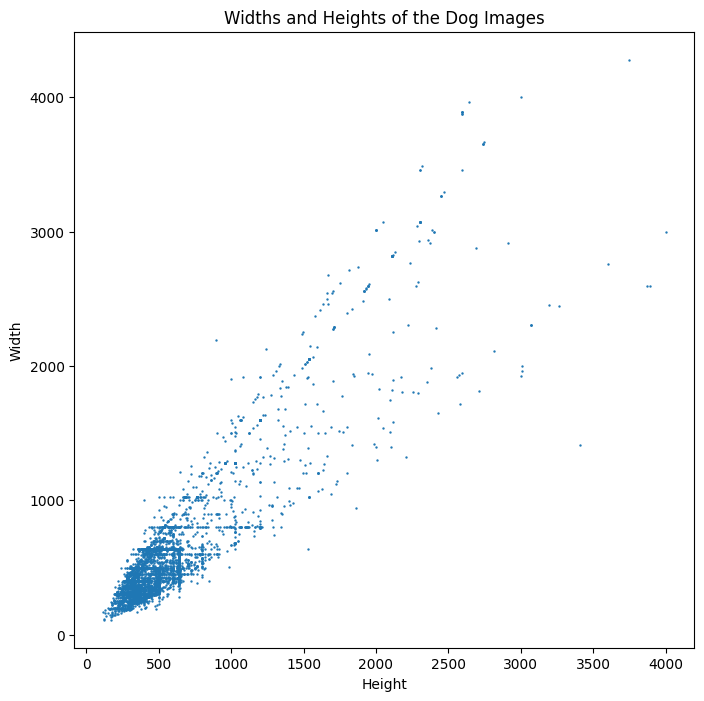

In [101]:
# Visualize the sizes via a scatter plot
plt.figure(figsize = (8,8))
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Widths and Heights of the Dog Images')
plt.scatter('height', 'width', s = .5, data = height_width_df)
plt.savefig(r'images\scattter.png', dpi=300, bbox_inches='tight')
plt.show();

It looks like quite a large number are fairly square. This is good!

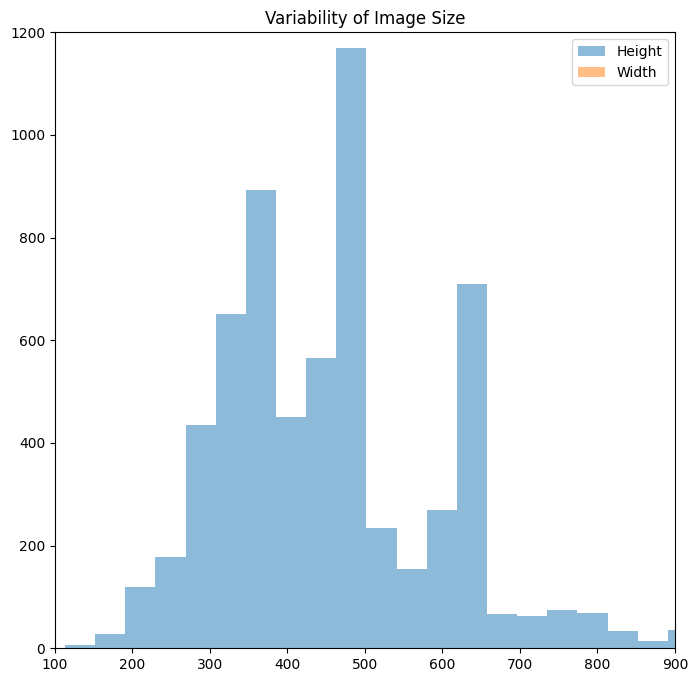

In [113]:
plt.figure(figsize = (8,8))
plt.hist(height, bins = 100, alpha=0.5)
plt.hist(width, bins = 100, alpha=0.5)
plt.axis([100, 900, 0, 1200])
plt.title('Variability of Image Size')
plt.legend(['Height', 'Width'])
plt.show()

The histogram shows there is a lot of variability in terms of sizes. 

### Histograms

Histogram equalization helps the CNN provide better accuracy since histogram equalization will increase the contrast level of the image. Due to this contrast stretching, the image will show artifacts and other useful features more prominently. You should get a better training result with histogram equalization. Lets look at some of the images and the histograms that they have.

In [25]:
def histogram_plot(idx):
    
    # Get image
    full_image = cv2.imread(train_files[idx])
    img = cv2.imread(train_files[idx], 0)
    
    # Caclulate histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    
    # Plot both images (histogram and picture)
    plt.subplot(121)
    plt.hist(img.ravel(), 256, [0, 256])
    plt.subplot(122)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.show()

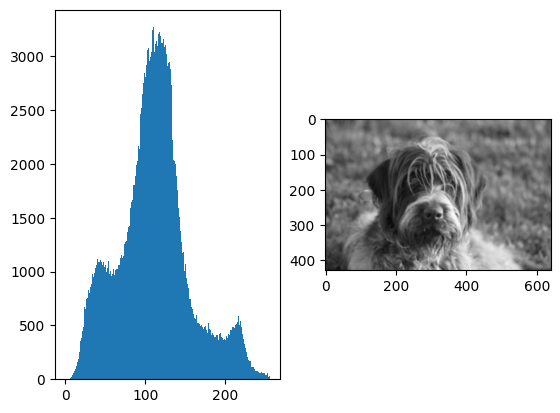

In [114]:
# Run this cell a few times to see the variation in the images
idx = random.randint(0, train_files.shape[0])
histogram_plot(idx)

What you want to see is a nice gaussian histogram. Some are very far away from that. 

---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [27]:
# Get back in the working directory where this dog_app is running
print(os.getcwd())
os.chdir(r'D:\OneDrive\Data Science\udacity\dsnd\P5 - Capstone')
print(os.getcwd())

D:\large_files\DSND_Capstone\data\dog_images\train
D:\OneDrive\Data Science\udacity\dsnd\P5 - Capstone


Number of faces detected: 1


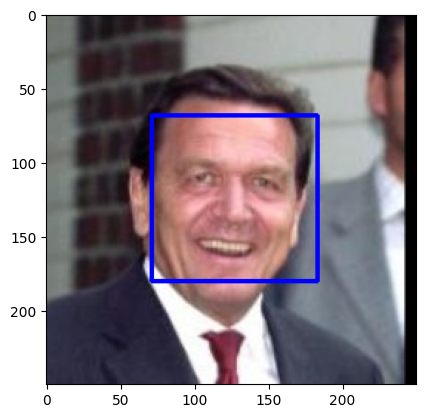

In [28]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [29]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

As below, accuracy for the human faces was 99%. Accuracy for dog_faces was 12%. That is still a lot of human faces that are recognized as a dog!

In [30]:
def human_or_dog(input_files):
    
    """Takes a list of files and calls face_detector to see if it is a human face
    
    input: input_files[] - contains the file paths for the images
    output: percentage_correct(np.float) - calculated percentage correct
    
    """
    count = 0
    
    for img_path in input_files:

        if face_detector(img_path):
            count += 1
        else:
            pass
    
    percentage_correct = count / len(input_files) * 100    
    
    return percentage_correct
    

In [31]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
print(f'Accuracy for human images is {human_or_dog(human_files_short)}%')
print(f'Accuracy for dog images is {human_or_dog(dog_files_short)}%')

Accuracy for human images is 98.0%
Accuracy for dog images is 12.0%


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer__: 

It is possible that for a later iteration of the dog_app that I would NOT require a clear human face. However, for the Minimum Viable Product (MVP), I would certainly require a clear picture. For subsequent releases I could explore this. There are techniques that are able to identify human faces with very little information. For example, the distance between your pupils is thought to be as unique as your fingerprints. Another solution is a convolution kernel https://towardsdatascience.com/whats-the-difference-between-haar-feature-classifiers-and-convolutional-neural-networks-ce6828343aeb that can recognize partially obscured faces. Facebook, for example, has trained neural networks that can recognize people based on characteristics like hair, body shape, and posture. For today's world with face coverings due to Covid or religon, these would be useful techniques.

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [32]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [33]:
# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [34]:
# from tensorflow.keras.preprocessing import image                  
# from tqdm import tqdm

def path_to_tensor(img_path):
    
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [35]:
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [36]:
## returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    
    prediction = ResNet50_predict_labels(img_path)
    
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

As below, perf_dog_detector did quite well. 0% of the human_files were detected as dog. 100% of the dog_files were detected as being dogs. Both of these results are excellent and what you want to see.

In [37]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

In [38]:
def perf_dog_detector(input_file):
    
    """Evaluates the accuracy of the dog_detector function
    input: input_file[] - list of image file paths
    output: percentage_accuracy(float) - Calculated accuracy in percentage of the dog_detector function
    """
    
    count = np.sum([dog_detector(img) for img in input_file])
    
    # Calculate percentage accuracy
    return (count / len(input_file)) * 100


In [39]:
print('The percentage of images in human_files_short that have a detected dog is:',\
perf_dog_detector(human_files_short), '%')
print('The percentage of images in dog_files_short that have a detected dog is:', \
perf_dog_detector(dog_files_short), '%')

The percentage of images in human_files_short that have a detected dog is: 2.0 %
The percentage of images in dog_files_short that have a detected dog is: 100.0 %


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [40]:
#from PIL import ImageFile                            
#ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
# Scale the values
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|███████████████████████████████████████████████████████████████████████████████| 836/836 [00:06<00:00, 125.11it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ 

- I tried using data augmentation to increase the skill of the classifier. It was WAAY worse AND it took eons to run. So, gave up on that. I will try this with the Inception Model below.
- Not sure why the example went with 223, 223 as the shape. I went with the 224, 224 which is what all of the previous code was using above. Also, having an odd size (as opposed to even) creates issues with strides, and padding. 
- The provided example Conv2D layers went from 16 to 64 filters. I went from 16 to 512 filters. This will  detect finer features than the base model provided. 
- A kernel size of 3,3 was used. I used a stride of 2. This reduces memory but does require padding. I used padding = same. 
- I used relu for its ability to detect non linear features. 
- I also added Dropout layers after every 2 layers to stop the CNN from over fitting. It was really bad at over fitting to start with. I used between .2 and .5 droput. I ended up at .4. The .4 dropout made a big difference in the validation accuracy. I also removed the last dropout layer. This helped a lot too.
- Between each convolution I used MaxPooling which reduces the dimensionality of images by reducing the number of pixels in the output from the previous convolutional layer. 
- I used a flatten layer to make my multidimensional layer linear to pass it onto a Dense layer. 
- The last layer is the final Dense layer which contains the softmax activation function and the number of dog breeds (133).

### My_CNN_Model

In [118]:
### TODO: Define your architecture.

# input shape, kernel, pool, and number of classes
input_shape = train_tensors.shape[1:]
kernel_size = (3, 3)
pool_size = (2, 2)
nof_classes = len(dog_names)

# Sequential model
model = Sequential()

# Initial input layer and creating cnn filters for feature recognition
model.add(Conv2D(filters=16, kernel_size=kernel_size, padding='same', activation='relu', input_shape=input_shape))
# Pooling reduces the amount of memory that you need
model.add(MaxPooling2D(pool_size=pool_size))
# Dropout prevents overfitting and lessens the computational load
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=kernel_size, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.4))
          
model.add(Conv2D(filters=64, kernel_size=kernel_size, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=kernel_size, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.4))

model.add(Conv2D(filters=256, kernel_size=kernel_size, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=kernel_size, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size))
          
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(nof_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1421 (Conv2D)         (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1422 (Conv2D)         (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1423 (Conv2D)         (None, 56, 56, 64)       

### Compile the Model

In [42]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [43]:
#from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 11

### Do NOT modify the code below this line.

start = datetime.now()

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data = (valid_tensors, valid_targets),
          epochs = epochs, 
          batch_size = 32, 
          callbacks = [checkpointer], 
          verbose = 1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20
418/418 [==============================] - 46s 96ms/step - loss: 4.9450 - accuracy: 0.0079 - val_loss: 4.8730 - val_accuracy: 0.0108

Epoch 00001: val_loss improved from inf to 4.87297, saving model to saved_models\weights.best.from_scratch.hdf5
Epoch 2/20
418/418 [==============================] - 38s 91ms/step - loss: 4.8584 - accuracy: 0.0129 - val_loss: 4.8264 - val_accuracy: 0.0275

Epoch 00002: val_loss improved from 4.87297 to 4.82638, saving model to saved_models\weights.best.from_scratch.hdf5
Epoch 3/20
418/418 [==============================] - 39s 94ms/step - loss: 4.5635 - accuracy: 0.0343 - val_loss: 4.3999 - val_accuracy: 0.0431

Epoch 00003: val_loss improved from 4.82638 to 4.39993, saving model to saved_models\weights.best.from_scratch.hdf5
Epoch 4/20
418/418 [==============================] - 39s 92ms/step - loss: 4.2842 - accuracy: 0.0509 - val_loss: 4.3926 - val_accuracy: 0.0467

Epoch 00004: val_loss improved from 4.39993 to 4.39257, saving model to save

### Load the Model with the Best Validation Loss

In [44]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [45]:
start = datetime.now()

# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

duration = datetime.now() - start
print("Prediction completed in time: ", duration)

Test accuracy: 10.0478%
Prediction completed in time:  0:00:41.971862


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### VGG16_Model

### Obtain Bottleneck Features

In [115]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [47]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [48]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [49]:
start = datetime.now()

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=10, batch_size=64, callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
105/105 [==============================] - 1s 9ms/step - loss: 9.4144 - accuracy: 0.1501 - val_loss: 4.9960 - val_accuracy: 0.3102

Epoch 00001: val_loss improved from inf to 4.99601, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 2/10
105/105 [==============================] - 1s 7ms/step - loss: 2.7845 - accuracy: 0.4900 - val_loss: 2.9576 - val_accuracy: 0.4874

Epoch 00002: val_loss improved from 4.99601 to 2.95764, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 3/10
105/105 [==============================] - 1s 7ms/step - loss: 1.4420 - accuracy: 0.6774 - val_loss: 2.5790 - val_accuracy: 0.5425

Epoch 00003: val_loss improved from 2.95764 to 2.57904, saving model to saved_models\weights.best.VGG16.hdf5
Epoch 4/10
105/105 [==============================] - 1s 7ms/step - loss: 0.8877 - accuracy: 0.7771 - val_loss: 2.2514 - val_accuracy: 0.5844

Epoch 00004: val_loss improved from 2.57904 to 2.25139, saving model to saved_models\weights.best.VGG16.h

### Load the Model with the Best Validation Loss

In [50]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [51]:
start = datetime.now()

# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Test accuracy: 67.1053%
Training completed in time:  0:00:37.475062


### Predict Dog Breed with the Model

In [52]:
# from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]


D:\large_files\DSND_Capstone\data\dog_images\test\092.Keeshond\Keeshond_06270.jpg
Prediction is: Keeshond
This is the image of the predicted dog which is a(n) Keeshond
Prediction completed in time:  0:00:01.916873


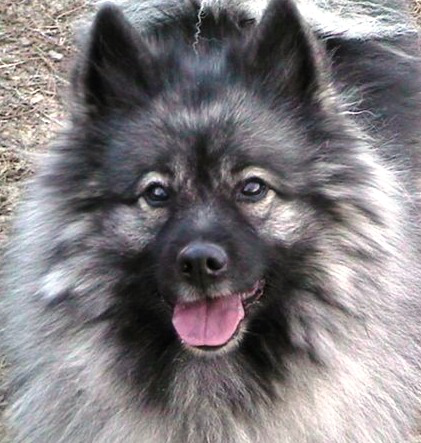

In [53]:
start = datetime.now()

# Run this cell a few times to see the predictions

# Get a random draw from the test_files
idx = random.randint(0, test_files.shape[0])
img_path = test_files[idx]
print(img_path)

# Get the prediction
pred = VGG16_predict_breed(img_path)
pred = pred.split('.')[1]
print(f'Prediction is: {pred}')

# Get the picture
img, breed = sample_images(test_files, idx, '.')
breed = breed.split('\\')[0]
print(f'This is the image of the predicted dog which is a(n) {breed}')
duration = datetime.now() - start
print("Prediction completed in time: ", duration)
img

## Other Models

I want to look at the effects of making more of the model layers trainable and data augmentation on the performance of the model.

### VGG16_two_off_the_bottom

This model has the bottom two layers removed and has those replace with 4 layers. I also use data augmentation.

In [54]:
nof_to_remove = 2
# Pretrained convolutional layers are loaded using the Imagenet weights.
# Include_top is set to False, in order to exclude the model's fully-connected layers.
base_vgg16 = VGG16(include_top=False,
                 weights='imagenet', 
                 input_shape=input_shape)
    
if nof_to_remove > 0:
        for layer in base_vgg16.layers[:-nof_to_remove]:
            layer.trainable = False
else:
    for layer in base_vgg16.layers:
        layer.trainable = False

# Create a new 'top' of the model (i.e. fully-connected layers).
# This is 'bootstrapping' a new top_model onto the pretrained layers.
top_vgg16 = base_vgg16.output
top_vgg16 = Flatten(name="flatten")(top_vgg16)
top_vgg16 = Dense(1024, activation='relu')(top_vgg16)
top_vgg16 = Dropout(0.2)(top_vgg16)
output_layer = Dense(nof_classes, activation='softmax')(top_vgg16)

# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=base_vgg16.input, outputs=output_layer)

# Compiles the model for training.
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Data Preprocessing

I applied the following preprocessing to the images. In CNN parlance this is known as data augmentation. Unfortunately, all that it did was confuse the classifier. It did not train up well at all. Perhaps if I ran thousands of epochs it would eventually learn. 

    rotation_range = 40, Rotated the image by 40%
    width_shift_range = 0.2, Shifted the image by 20% in the width
    height_shift_range = 0.2, Shifted the image by 20% in the height
    shear_range = 0.2, 20% of the time  randomly apply shearing transformations
    zoom_range = 0.2, zoom_range is for randomly zooming inside pictures 20% of the time
    horizontal_flip = True, randomly flipping images
    fill_mode = 'nearest') fill_mode is the strategy used for filling in newly created pixels, which can appear after a  rotation or a width/height shift.

In [55]:
# Create the train generator
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [56]:
# create the test generator
valid_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [57]:
# fit the augmented data
train_datagen.fit(train_tensors)
valid_datagen.fit(valid_tensors)

In [58]:
# sandbox
### TODO: specify the number of epochs that you would like to use to train the model.
### Do NOT modify the code below this line.

epochs = 10
batch_size = 8
steps_per_epoch = int(train_tensors.shape[0] / batch_size)
validation_steps = int(valid_tensors.shape[0] / batch_size)

checkpointer = ModelCheckpoint(filepath='saved_models/vgg_best_trainable_layers.hdf5', 
                               verbose=1, save_best_only=True)

# Use the generators to feed the model
model_history_vgg16 = model.fit(train_datagen.flow(train_tensors, train_targets, batch_size = batch_size),
                    steps_per_epoch = steps_per_epoch,
                    epochs = epochs, 
                    verbose = 1, 
                    callbacks = [checkpointer],
                    validation_data = valid_datagen.flow(valid_tensors, valid_targets, batch_size=batch_size),
                    validation_steps = validation_steps)

Epoch 1/10
835/835 [==============================] - 255s 298ms/step - loss: 4.9720 - accuracy: 0.0081 - val_loss: 4.8710 - val_accuracy: 0.0108

Epoch 00001: val_loss improved from inf to 4.87102, saving model to saved_models\vgg_best_trainable_layers.hdf5
Epoch 2/10
835/835 [==============================] - 249s 298ms/step - loss: 4.8774 - accuracy: 0.0100 - val_loss: 4.8686 - val_accuracy: 0.0108

Epoch 00002: val_loss improved from 4.87102 to 4.86856, saving model to saved_models\vgg_best_trainable_layers.hdf5
Epoch 3/10
835/835 [==============================] - 249s 298ms/step - loss: 4.8941 - accuracy: 0.0112 - val_loss: 4.8684 - val_accuracy: 0.0108

Epoch 00003: val_loss improved from 4.86856 to 4.86842, saving model to saved_models\vgg_best_trainable_layers.hdf5
Epoch 4/10
835/835 [==============================] - 249s 298ms/step - loss: 4.8774 - accuracy: 0.0106 - val_loss: 4.8693 - val_accuracy: 0.0108

Epoch 00004: val_loss did not improve from 4.86842
Epoch 5/10
835/83

Truly abysmal results. Validation accuracy is around 1% which is only slightly better than random chance and the weights are not getting less. 

### Load the Model with the Best Validation Loss

In [59]:
model.load_weights('saved_models/vgg_best_trainable_layers.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [60]:
start = datetime.now()

# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

duration = datetime.now() - start
print("Prediction completed in time: ", duration)

Test accuracy: 1.3158%
Prediction completed in time:  0:01:31.080182


---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [61]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogInceptionV3Data.npz')
train_IV3 = bottleneck_features['train']
valid_IV3 = bottleneck_features['valid']
test_IV3 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

- I am keeping all of the training weights (bottleneck features) from the InceptionV3 model.
- I tried several architectures, but ... the simple CNN architecture shown below worked the best.
- GlobalAveragePooling seems to retain the feature information and reduces the memory requirements.
- The Dropout layer is used for over fitting. I did a grid search on the parameters for the Dropout. The one shown below is the optimum.
- The final layer (Dense) is used to produce the prediction from the model.
- The accuracy is amazing. After only 2 epochs it is 85% on validation. Truly phenomenal (my opinion). This is well above the 60% threshold for this rubric item.
- I did not try unfreezing the last few layers of the InceptionV3 model. My guess is that this might improve the performance.

### IV3_Model

In [62]:
IV3_model = Sequential()
IV3_model.add(GlobalAveragePooling2D(input_shape=train_IV3.shape[1:]))
IV3_model.add(Dropout(0.5))
IV3_model.add(Dense(133, activation='softmax'))
IV3_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [63]:
### TODO: Compile the model.
# set hyperparameters
IV3_model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [64]:
### TODO: Train the model.
checkpoint = ModelCheckpoint(filepath = 'saved_models/IV3_model.h5', 
                             verbose = 1, 
                             save_best_only = True)

start = datetime.now()

model_history = IV3_model.fit(train_IV3, 
                              train_targets, 
                              validation_data = (valid_IV3, valid_targets),
                              epochs = 5, 
                              batch_size = 32, 
                              callbacks = [checkpoint], 
                              verbose = 1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/5
209/209 [==============================] - 2s 8ms/step - loss: 1.6584 - accuracy: 0.6087 - val_loss: 0.5911 - val_accuracy: 0.8168

Epoch 00001: val_loss improved from inf to 0.59106, saving model to saved_models\IV3_model.h5
Epoch 2/5
209/209 [==============================] - 2s 8ms/step - loss: 0.5821 - accuracy: 0.8222 - val_loss: 0.5775 - val_accuracy: 0.8395

Epoch 00002: val_loss improved from 0.59106 to 0.57748, saving model to saved_models\IV3_model.h5
Epoch 3/5
209/209 [==============================] - 1s 7ms/step - loss: 0.4456 - accuracy: 0.8551 - val_loss: 0.5670 - val_accuracy: 0.8383

Epoch 00003: val_loss improved from 0.57748 to 0.56701, saving model to saved_models\IV3_model.h5
Epoch 4/5
209/209 [==============================] - 1s 7ms/step - loss: 0.3339 - accuracy: 0.8900 - val_loss: 0.5807 - val_accuracy: 0.8311

Epoch 00004: val_loss did not improve from 0.56701
Epoch 5/5
209/209 [==============================] - 1s 7ms/step - loss: 0.2841 - accuracy:

### Plot Training & Test Scores

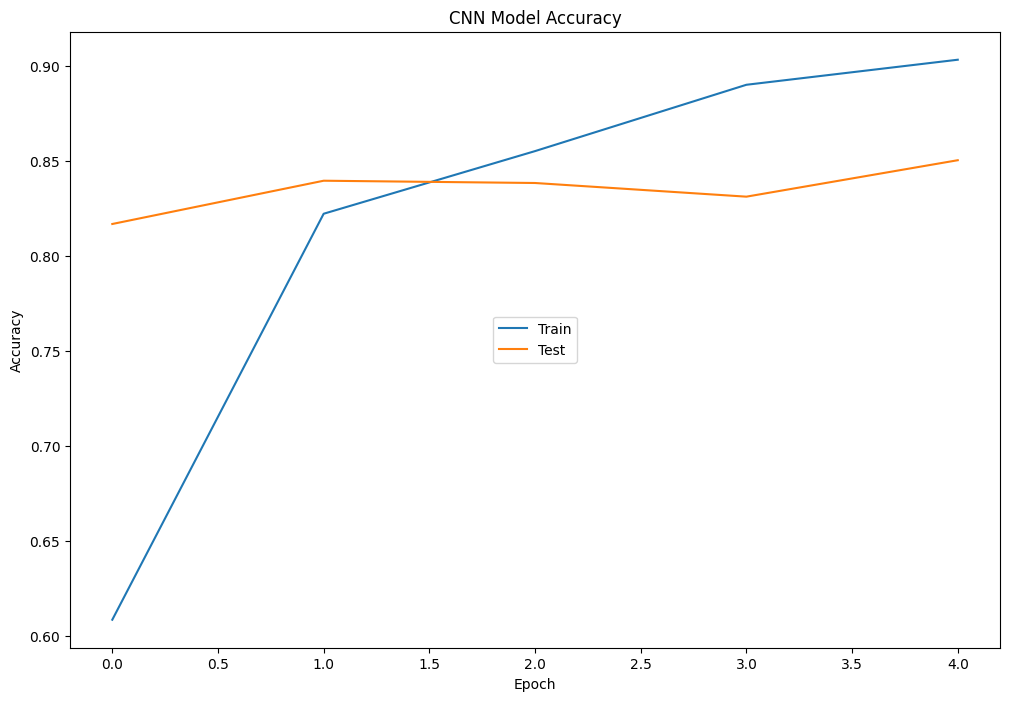

In [65]:
# This is for IV3 (Inception) accuracy
plt.figure(figsize = (12,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'center')
plt.show()

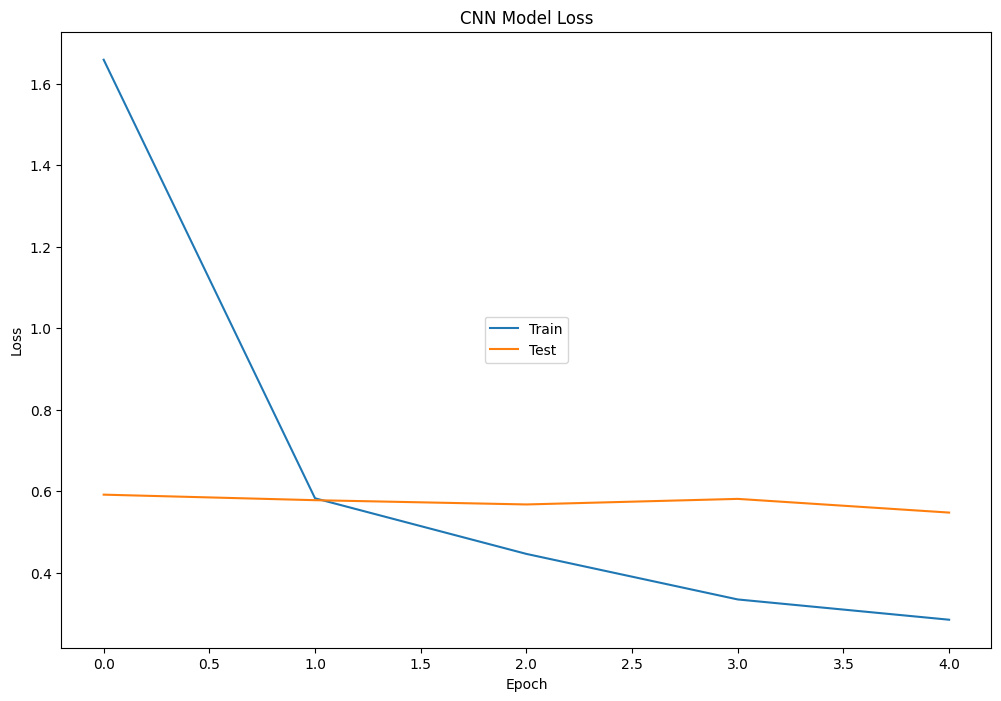

In [66]:
# This is for IV3 (Inception) loss
plt.figure(figsize = (12,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'center')
plt.show()

As you can see the model trains up exceptionally fast and then the accuracy and the loss does not improve. No need to train further!

### Stanford Dataset and InceptionV3

We did all that work to see if the Stanford dataset would be better than the Udacity dataset which is a subset of the ImageNet data. Lets see if that is the case. I have prepared that in a separate notebook called iv3_stanford.ipynb. 

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [67]:
### TODO: Load the model weights with the best validation loss.
# load the saved model in as best_model
best_model = load_model('saved_models/IV3_model.h5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [68]:
start = datetime.now()

### TODO: Calculate classification accuracy on the test dataset.
preds = [np.argmax(best_model.predict(np.expand_dims(feature, axis = 0))) for feature in test_IV3]

# report test accuracy
test_accuracy = 100 * np.sum(np.array(preds) == np.argmax(test_targets, axis = 1)) / len(preds)
print(f'InceptionV3 with transfer learning test file accuracy is: {round(test_accuracy, 2)}%')

duration = datetime.now() - start
print("Prediction completed in time: ", duration)

InceptionV3 with transfer learning test file accuracy is: 79.67%
Prediction completed in time:  0:00:36.197737


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [69]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

In [70]:
# from extract_bottleneck_features import *

def IV3_predict_breed(img_path):
    """Accepts an image path and returns a prediction as to the breed of the dog
    input: img_path(str) path for the image
    output: pred(str) breed prediction"""
    
    # extract bottleneck features
    bottleneck_feature = extract_InceptionV3(path_to_tensor(img_path))
    
    # obtain predicted vector
    predicted_vector = IV3_model.predict(bottleneck_feature)
    
    # Get the prediction
    pred = dog_names[np.argmax(predicted_vector)]
    pred = pred.split('.')[1]
    
    # return dog breed that is predicted by the model
    return pred


D:\large_files\DSND_Capstone\data\dog_images\test\016.Beagle\Beagle_01196.jpg
Predicted breed is: Beagle
This is the image of the predicted dog which is a(n) Beagle
Prediction completed in time:  0:00:03.627253


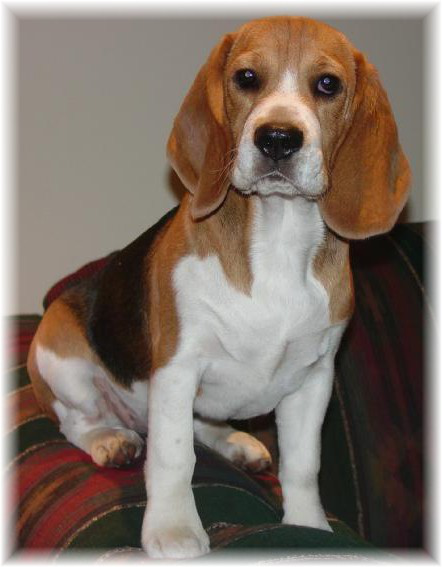

In [90]:
start = datetime.now()

# Run this cell a few times to see the predictions

# Get a random draw from the test_files
idx = random.randint(0, test_files.shape[0])
img_path = test_files[idx]
print(img_path)

# Print the prediction
pred = IV3_predict_breed(img_path)
print(f'Predicted breed is: {pred}')

# Get the picture
img, breed = sample_images(test_files, idx, '.')
breed = breed.split('\\')[0]
print(f'This is the image of the predicted dog which is a(n) {breed}')
duration = datetime.now() - start
print("Prediction completed in time: ", duration)
img

This is a pretty accurate algorithm!

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [72]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

In [73]:
def predict_breed(img_path):
    """Accepts a file path to an image and first determines whether the image contains a human, dog, or neither. Then,
    if a dog is detected in the image, return the predicted breed.
    if a human is detected in the image, return the resembling dog breed.
    if neither is detected in the image, provide output that indicates an error.
    input: img_path(str) - The image path to the image of interest"""
    
    # Get the prediction
    pred = IV3_predict_breed(img_path)
    
    # Use the dog_detector function to detect whether or not there is a dog
    if dog_detector(img_path):
        return pred, 'dog'

    # Use the face_detector to detect a face
    elif face_detector(img_path):
        return pred, 'human'

    else:
        return pred, 'other'


In [74]:
start = datetime.now()

# Get a random draw from the test_files
idx = random.randint(0, test_files.shape[0])
img_path = test_files[idx]
print(img_path)

# Read in the image using cv2 and show the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Predict the breed
pred, type_ = predict_breed(img_path)
print(f'This is a dog and the predicted breed is: {pred}')
duration = datetime.now() - start
print("Prediction completed in time: ", duration)

# Show the image
plt.imshow(img);

D:\large_files\DSND_Capstone\data\dog_images\test\077.Gordon_setter\Gordon_setter_05280.jpg
This is a dog and the predicted breed is: Gordon_setter
Prediction completed in time:  0:00:03.981662


---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

- I am quite stunned at how well the Inception model worked. That is very impressive. In just 2 epochs it reached an 85% accuracy. Also, since a lot of the dog breeds are very similar and I am not a dog breed expert. I think the accuracy is even better than what it really is!
- The obvious potential improvement here is data augmentation. However, I tried this earlier in the Other Models section and the results were abysmal. Not sure why.
- Based on the work that I did in this notebook trying to improve the Transfer Training, over and above what it did quite quickly, I am fairly pessimistic that we can improve upon it. 
- I have done the equivalent of Grid Search using dropout (my CNN) and batch sizes (VGG and Inception).

In [75]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

In [76]:
# Create a dictionary of 1 image per folder to be used when it is a human
breed_img_dict = {}
paths = glob(r'D:\large_files\DSND_Capstone\data\dog_images\test\*\\')
for path in paths:
    
    # Get the files in the breed folder
    files_in_folder = glob(path +  r'*.*')
    
    # Get the first file
    img_path = files_in_folder[0]
    
    # Convert the image to numbers
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get the breed name
    breed = path.split('.')[1][:-1]
    
    # Update the dictionary
    breed_img_dict[breed] = img
    
# pickle the dictionary
with open(r'data\breed_img_dict.p', 'wb') as handle:
    pickle.dump(breed_img_dict, handle)

# Should be 133 long
len(breed_img_dict)                           

133

In [77]:
# Get some files off my disk drives and see how they are evaluated
n = 2
paths = glob(r'C:\Users\Lindsay\AI_P6\photos\test\*\\')
other_img_ = []
for times in range(n):
    for path in paths:
    
        # Get the files in the test folders
        files_in_folder = glob(path +  r'*.*')

        # Get a random file
        idx = random.randint(0, len(files_in_folder))
        img_path = files_in_folder[idx]
        
        # Append the files
        other_img_.append(img_path)

other_img_ = np.array(other_img_)

In [78]:
def test_pics_preds(array, n):
    """Gets a random draw of n images from an array of file paths then returns several images"""
    
    # Get pictures
    img_list = []
    idx_list = []
    pred_list = []
    for num in range(n):
        
        # Get random picture
        idx = random.randint(0, array.shape[0] - 1)
        img_path = array[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_list.append(img)
        
        # Get the prediction
        pred, type_ = predict_breed(img_path)
        
        if type_ == 'dog':
            img = cv2.imread(r'images\dog.png')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append(img)
            pred_list.append((pred, type_))
        elif type_ == 'human':
            img_list.append(breed_img_dict[pred])
            pred_list.append((pred, type_))
        elif type_ == 'other':
            img = cv2.imread(r'images\question.png')
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append(img)
            pred_list.append((np.nan, 'other'))
        else:
            print('This should never happen!', pred, type_)
        
        idx_list.append(idx)
         
    return img_list, idx_list, pred_list


In [79]:
start = datetime.now()

# Get input test pics
dog_img_list, dog_idx_list, dog_pred_list = test_pics_preds(test_files, n)
human_img_list, human_idx_list, human_pred_list = test_pics_preds(human_files, n)
other_img_list, other_idx_list, other_pred_list = test_pics_preds(other_img_, n)

img_list = dog_img_list + human_img_list + other_img_list
idx_list = dog_idx_list + human_idx_list + other_idx_list
pred_list = dog_pred_list + human_pred_list + other_pred_list

# Need to allow this to index properly in the loop.
human_idx_list = human_idx_list * 3
dog_idx_list = dog_idx_list * 3
other_idx_list = other_idx_list * 3

duration = datetime.now() - start
print("Prediction completed in time: ", duration)

Prediction completed in time:  0:00:25.399793


In [80]:
titles = []
for idx, pred in enumerate(pred_list):
    if pred[1] == 'dog':
        title = f'Predicted Dog: {pred[0]}'
        titles.append(title)
        titles.append('Its a Dog!')
        
    elif pred[1] == 'human':
        idx_ = human_idx_list[idx]
        path = human_files[idx_]
        name = path.split('\\')[4]
        titles.append(name)
        title = f'Looks like a: {pred[0]}'
        titles.append(title)
        
    elif pred[1] == 'other':
        title = 'Not a dog / human:('
        titles.append(title)
        title = 'Only pictures of dogs / humans!'
        titles.append(title)
        
    else:
        print('This should never happen!!')

                                Dog Breed Predictions and What Breed Looks Like a Human                                 


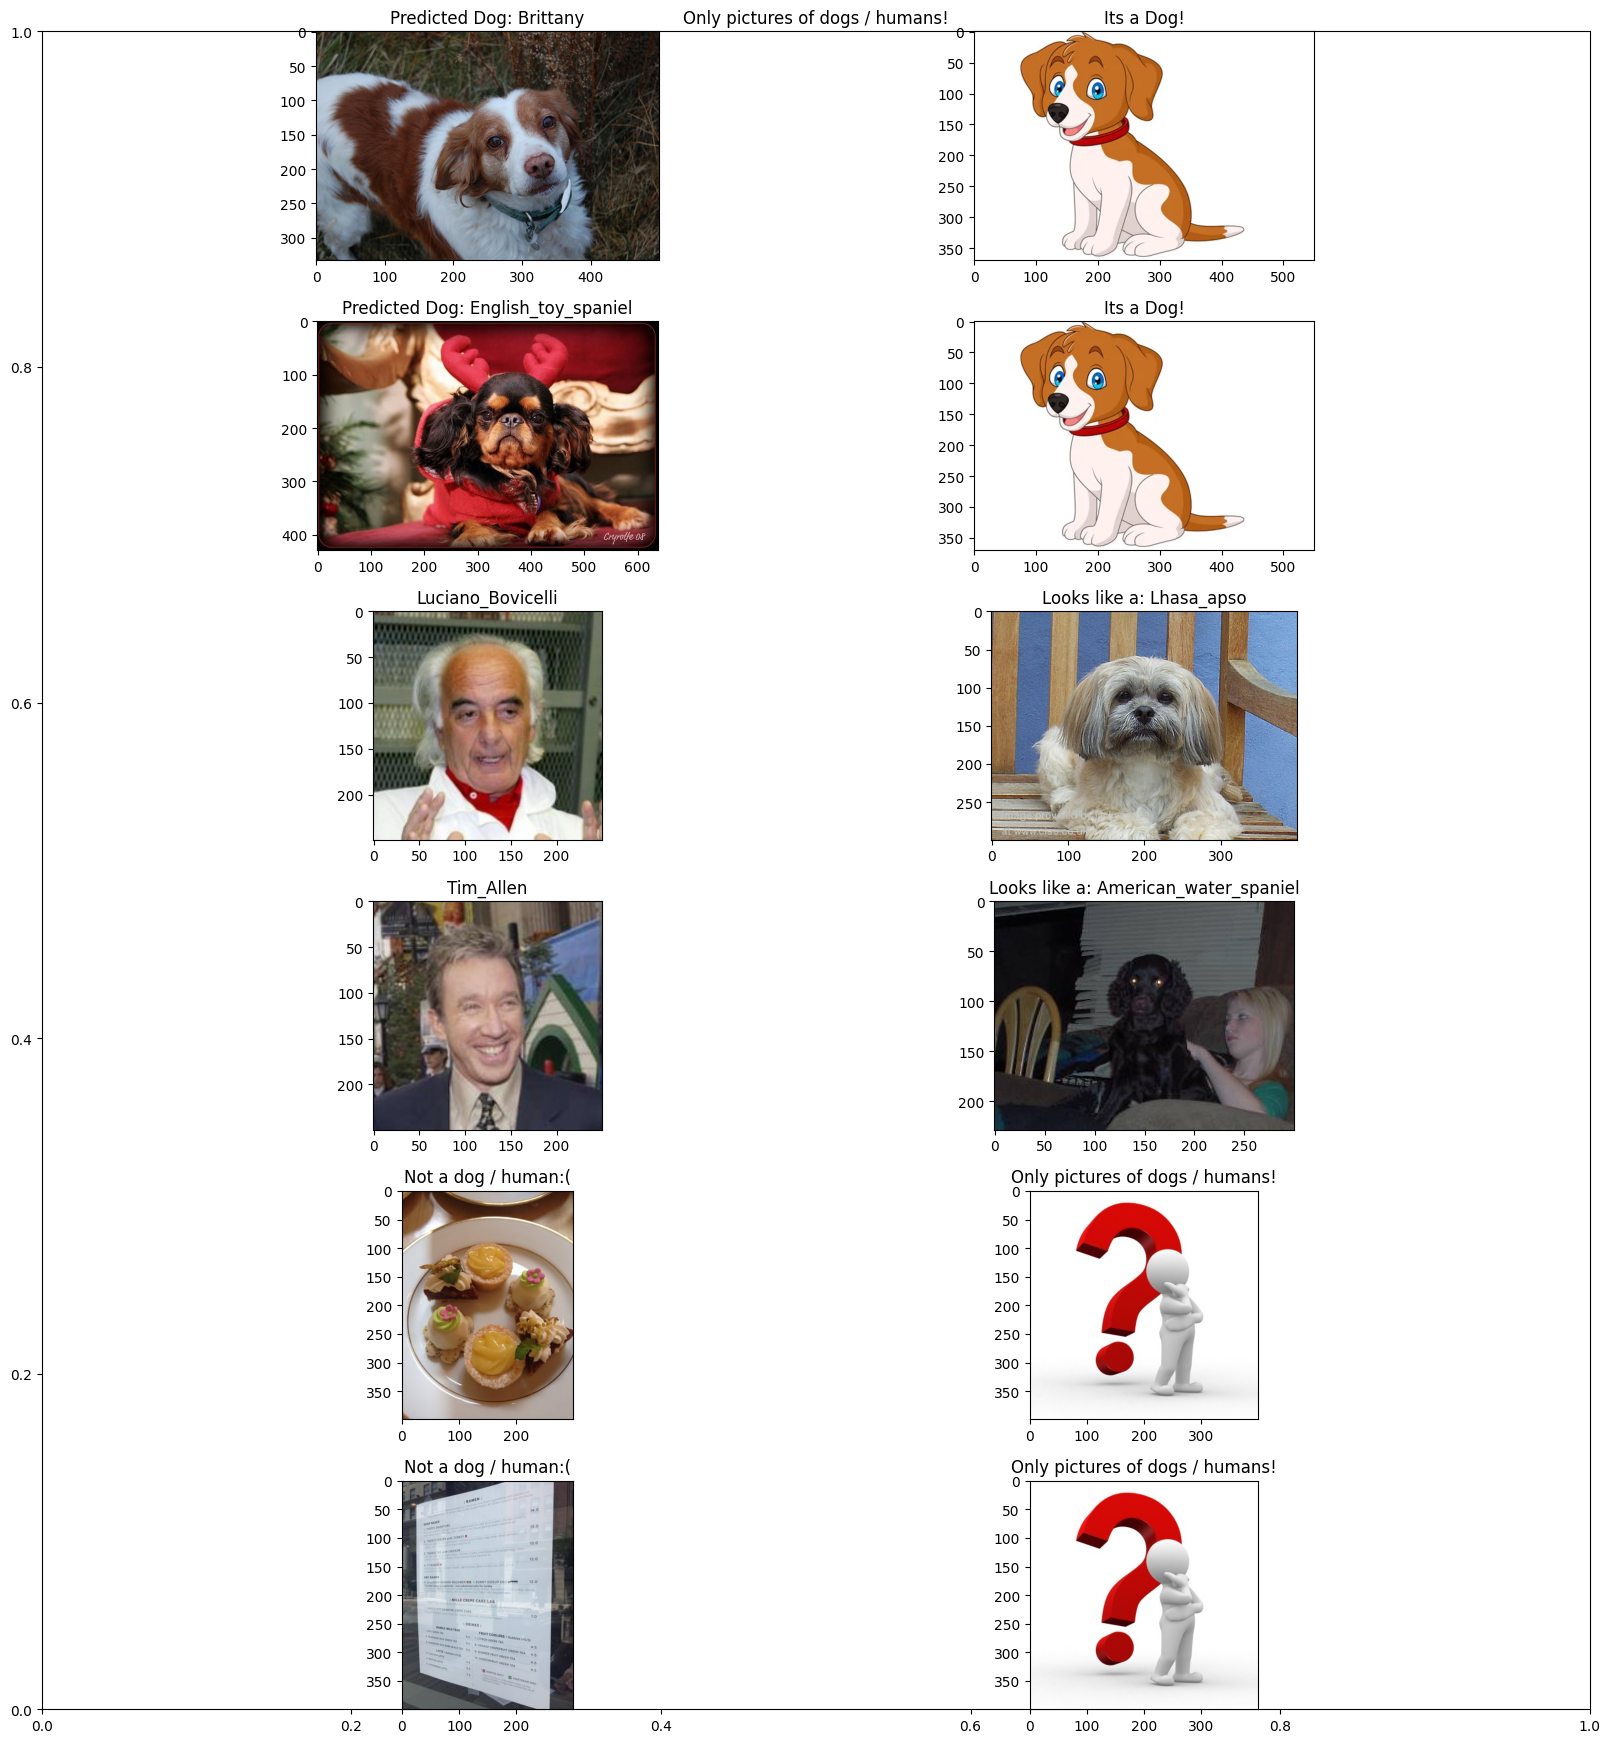

In [92]:
# subplot all of the pictures with predictions and titles
width = os.get_terminal_size().columns
print('Dog Breed Predictions and What Breed Looks Like a Human'.center(width))
fig = plt.figure(figsize=(16, 3 * len(pred_list)))
columns = 2
rows = len(pred_list)
for i in range(1, columns * rows + 1):
    plt.title(titles[i-2])
    img = img_list[i-1]
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(img)
plt.title(titles[-1]) # print the last title on the last image
plt.show();

## Refinement

There are literally dozens of discarded models. I have a GPU (8GB) and my machine has 32 GB of memory. I would have kept these models, however, it would have unnecessarily cluttered this notebook. There are still 4 CNN models in this notebook that show refinement from the inital hand coded CNN with ~ 10% accuracy to the InceptionV3 (IV3_model) that has 85% accuracy! Remember CNN models are stochastic. Results will vary:)

## Model Evaluation and Validation

In [2]:
df = pd.read_csv('model_rel_perf.csv')
df.sort_values(by = ['Accuracy'], ascending = False, inplace = True)
df1 = df.copy()
df

,Model_Name,Description,Comments,Epochs,Batch_Size,Accuracy,Training_Time,Prediction _Time _All,One_Prediction,Trainable_Params
3,IV3_model,InceptionV3 transfer learning,3 new layers provided,5,32,83.71,0.25,0.60,0.17,272517
1,VGG16_model,VGG transfer learning,"Only 2 layers, glbal_average_pooling_2d and dense",10,64,75.12,0.11,0.66,0.12,68229
4,IV3_model_16_layers,InceptionV3 transfer learning,16 layers trained,7,32,71.00,54.00,NaN,NaN,641144
0,My_CNN_Model,Custom coded by me,Ideas on the internet and course material,20,32,10.05,10.74,0.70,NaN,6428709
2,VGG16_two_off_the_bottom,VGG transfer learning,More layers trained with data augmentation,10,8,1.10,42.00,1.50,NaN,28187269


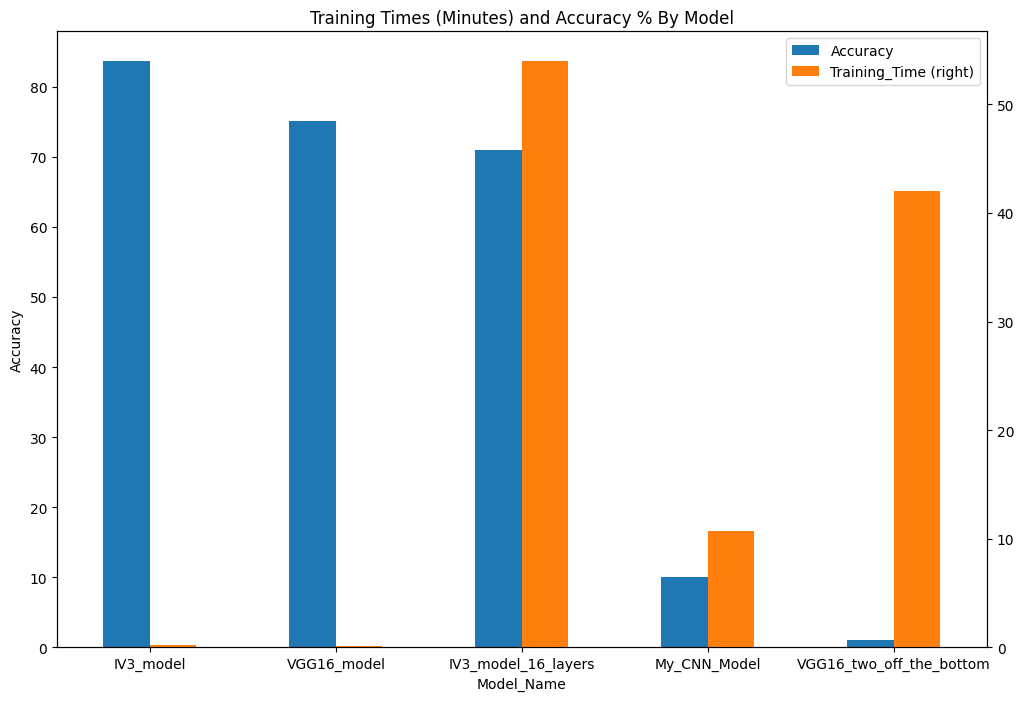

In [3]:
# Bar plot of accuracy and training times by model

df1 = df1[['Model_Name', 'Accuracy', 'Training_Time']]
df1.set_index('Model_Name', inplace = True)

df1.plot(kind= 'bar', 
               secondary_y = 'Training_Time', 
               rot= 0, 
               figsize = (12, 8),
               ylabel = 'Accuracy')
plt.title('Training Times (Minutes) and Accuracy % By Model')
plt.show();

As you can see the 2 transfer training models (VGG16_model and IV3_model) are the most accurate by far AND with the lowest training times. The take aways from the training and the parameters are as follows. Times are in minutes.

- For the models with the highest accuracy and the shortest training times (above), very few epochs were required.
- Batch size had a large impact on whether or not the model would actually run. I have an older GPU and it would often run out of memory with larger batch sizes. However, the IV3 model allowed large batch sizes (e.g. 512) and was blazingly fast to train.
- You could see very quickly the effects of dropout in terms of keeping the model learning. This was evident by the divergence or non divergence of the accuracy scores for train and test as the model progressed.
- The prediction time for all of the targets was quite slow. For individual targets it was usually about 15 seconds, which is probably acceptable. However, this does not include round trip times for internet delays etc. This might be a challenge.
- Finally, if you look at the Trainable_Params column the HIGHER the numbers, the LOWER the accuracy. This is the exact opposite of what you want to happen.

## Justification

I tried removing layers and training the resultant model. I usually ran into memory problems. When I did not, the model trained very slowly. I would recommend the IV3 model. It performed VERY well, trained quickly and except for the time for predicdtion on a single dog, is very performant. All of the models were slow on predicting a single instance.

## Reflection

It is quite easy to overwhelm your computer resources. Even though I have a GPU, it too is memory limited. It appears to me that Transfer Learning is here to stay for the foreseeable future as it does not require GPUs (typically) and the results are stellar. 

## Improvements

- One of the major issues with achieving excellent results with any machine learning project and this is especially true with deep learning, is coming up with a process for trying out different combinations of hyper parameters. I mean hyper parameters in the broadest sense. It is not just which optimizer you choose for the training run. It is also which dataset you choose for training. How, you scale the data, etc., etc. The permutations and combinations EVEN after you have decided to use Transfer Learning are extremely large. 
- There are Automated Machine Learning technologies available from all of the major cloud vendors and companies like Neptune that help you achieve this. Using these technologies is beyond the scope of this project. However, any company or organization that is serious about deriving value from data science would be well advised to deal with this very serious process issue up front. Otherwise, the amount of technical debt incurred over time will be truly frightening.